In [1]:
import cartopy
import matplotlib.pyplot as plt
import netCDF4
import numpy

In [2]:
OM4p25 = netCDF4.Dataset('/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_hgrid.nc')
x25 = OM4p25.variables['x'][:][::2,::2]
y25 = OM4p25.variables['y'][:][::2,::2]
print(x25.shape)
OM4p5 = netCDF4.Dataset('/archive/gold/datasets/OM4_05/mosaic.v20170622.unpacked/ocean_hgrid.nc')
x5 = OM4p5.variables['x'][:][::2,::2]
y5 = OM4p5.variables['y'][:][::2,::2]
print(x5.shape)

(1081, 1441)
(577, 721)


In [3]:
def pltgrd(x, y, color, subsamp):
    nj,ni = x.shape
    for j in range(0,nj,subsamp):
        plt.plot(x[j,:], y[j,:], color, transform=cartopy.crs.PlateCarree())
        plt.plot(x[j,:]+360, y[j,:], color, transform=cartopy.crs.PlateCarree())
    for i in range(0,ni,subsamp):
        plt.plot(x[:,i], y[:,i], color, transform=cartopy.crs.PlateCarree())

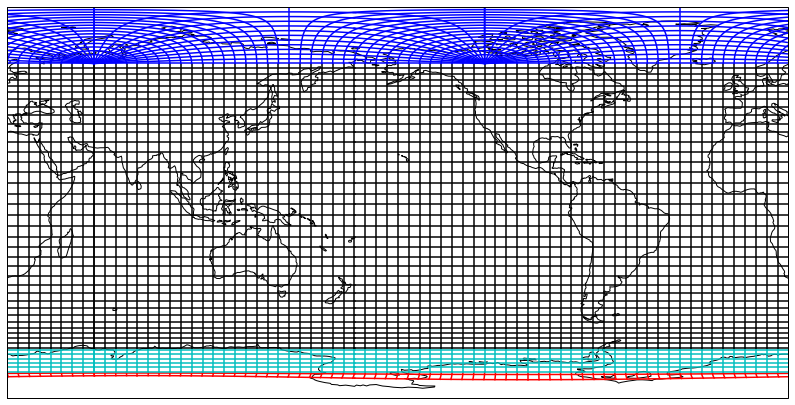

In [4]:
plt.figure(figsize=(14,14))
ax = plt.subplot(111, projection=cartopy.crs.PlateCarree(central_longitude=-160))
ax.coastlines()
pp = [[0, 30, 'r'], [30, 140, 'c'], [140, 840, 'k'], [840, 1081, 'b']]
ss = 4*5
for p in pp:
    js = slice(p[0],p[1])
    pltgrd(x25[js,:], y25[js,:], p[2], ss)

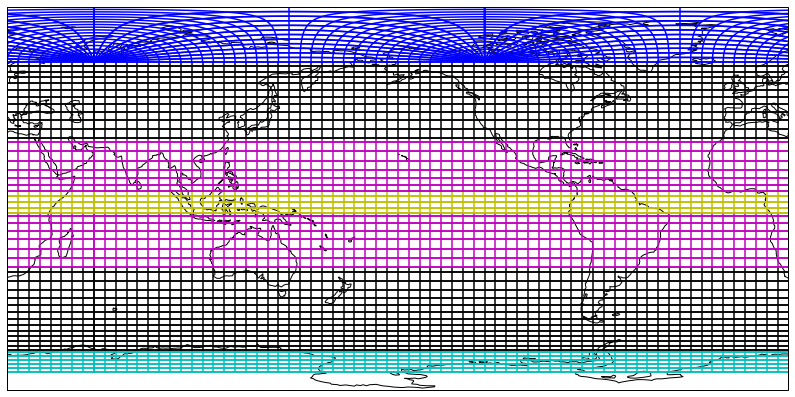

In [5]:
plt.figure(figsize=(14,14))
ax = plt.subplot(111, projection=cartopy.crs.PlateCarree(central_longitude=-160))
ax.coastlines()
pp = [[0, 54, 'c'], [54, 179, 'k'], [179, 244, 'm'], [244, 283, 'y'], [283, 347, 'm'], [347, 456, 'k'], [456, 577, 'b']]
ss = 2*5
for p in pp:
    js = slice(p[0],p[1])
    pltgrd(x5[js,:], y5[js,:], p[2], ss)

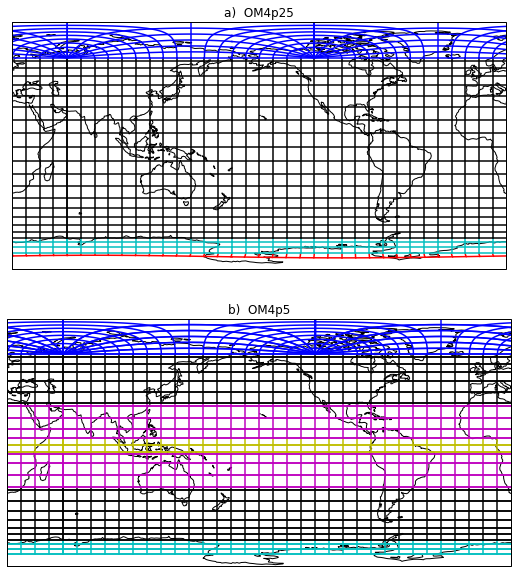

In [6]:
plt.figure(figsize=(10,10))
ax = plt.subplot(211, projection=cartopy.crs.PlateCarree(central_longitude=-160))
ax.coastlines()
pp = [[0, 30, 'r'], [30, 140, 'c'], [140, 840, 'k'], [840, 1081, 'b']]
ss = 4*10
for p in pp:
    js = slice(p[0],p[1])
    pltgrd(x25[js,:], y25[js,:], p[2], ss)
plt.title('a)  OM4p25')
ax = plt.subplot(212, projection=cartopy.crs.PlateCarree(central_longitude=-160))
ax.coastlines()
pp = [[0, 54, 'c'], [54, 179, 'k'], [179, 244, 'm'], [244, 283, 'y'], [283, 347, 'm'], [347, 456, 'k'], [456, 577, 'b']]
ss = 2*10
for p in pp:
    js = slice(p[0],p[1])
    pltgrd(x5[js,:], y5[js,:], p[2], ss)
plt.title('b)  OM4p5');

# plt.savefig('grids.png')

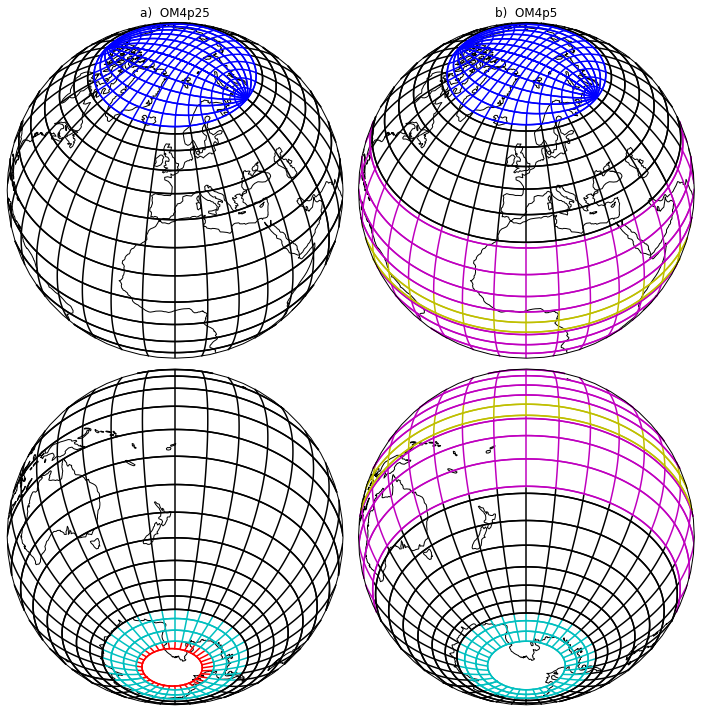

In [7]:
plt.figure(figsize=(10,10))
pp = [[0, 30, 'r'], [30, 140, 'c'], [140, 840, 'k'], [840, 1081, 'b']]
ss = 4*10
ax = plt.subplot(221, projection=cartopy.crs.NearsidePerspective(central_longitude=0,central_latitude=45))
ax.coastlines()
for p in pp:
    js = slice(p[0],p[1])
    pltgrd(x25[js,:], y25[js,:], p[2], ss)
plt.title('a)  OM4p25')
ax = plt.subplot(223, projection=cartopy.crs.NearsidePerspective(central_longitude=180,central_latitude=-45))
ax.coastlines()
for p in pp:
    js = slice(p[0],p[1])
    pltgrd(x25[js,:], y25[js,:], p[2], ss)

pp = [[0, 54, 'c'], [54, 179, 'k'], [179, 244, 'm'], [244, 283, 'y'], [283, 347, 'm'], [347, 456, 'k'], [456, 577, 'b']]
ss = 2*10
ax = plt.subplot(222, projection=cartopy.crs.NearsidePerspective(central_longitude=0,central_latitude=45))
ax.coastlines()
for p in pp:
    js = slice(p[0],p[1])
    pltgrd(x5[js,:], y5[js,:], p[2], ss)
plt.title('b)  OM4p5');
ax = plt.subplot(224, projection=cartopy.crs.NearsidePerspective(central_longitude=190,central_latitude=-45))
ax.coastlines()
for p in pp:
    js = slice(p[0],p[1])
    pltgrd(x5[js,:], y5[js,:], p[2], ss)

plt.tight_layout()

plt.savefig('grids.png')